# وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ

In [ ]:
import joblib
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize

c:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download data

In [2]:

path = kagglehub.dataset_download("anthonytherrien/depression-dataset")

print("Dataset path:", path)

for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        csv_path = os.path.join(path, file_name)
        break

Dataset path: C:\Users\User.DESKTOP-OQ6NE4T\.cache\kagglehub\datasets\anthonytherrien\depression-dataset\versions\1


In [3]:
file=pd.read_csv(csv_path)

In [4]:
file

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


# show data info

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
file.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


>> [Income] has Outliers

# Check nulls and duplicated values

In [7]:
file['Income'].isnull().sum()

0

In [8]:
file.duplicated().sum()

0

## -----------------------------------------------------**EDR**-----------------------------------------------------
## ------------------------------------------*Descriptive Analysis Questions*------------------------------------  
## ---------------------------------------------------------------------------------------------------------------
##


Which marital status category is the most common?


In [9]:
file

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


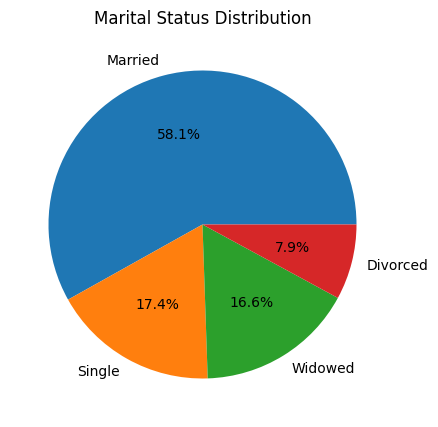

In [10]:
Marital_Status=file['Marital Status'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x=Marital_Status,labels=Marital_Status.index,autopct='%.1f%%')
plt.title("Marital Status Distribution")
plt.show()

How is the distribution of education levels among individuals?


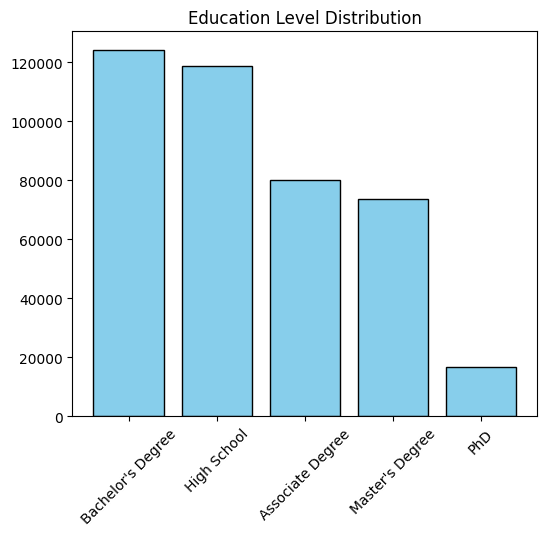

In [11]:
edu_level=file['Education Level'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(edu_level.index, edu_level.values, color='skyblue', edgecolor='black')
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.show()

What is the average fixed income across all records?


In [12]:
np.average(file['Income'])

50661.70797130275

Which physical activity level is the most frequent?


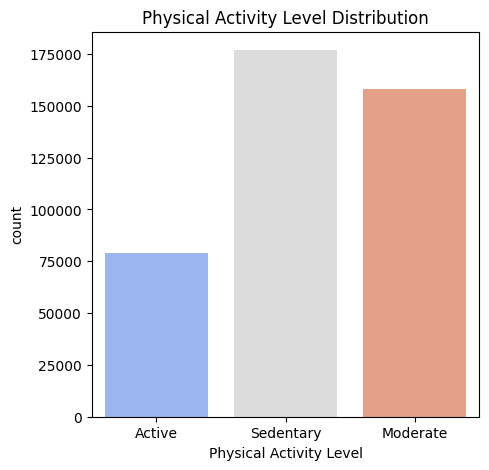

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=file,x='Physical Activity Level',palette='coolwarm',hue='Physical Activity Level',legend=False)
plt.title("Physical Activity Level Distribution")
plt.show()

What proportion of individuals have a history of mental illness?


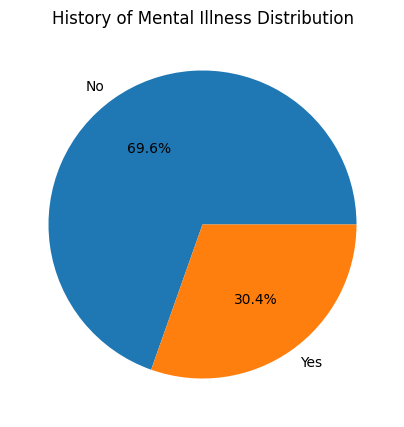

In [14]:
mentail_h=file['History of Mental Illness'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x=mentail_h.values,labels=mentail_h.index,autopct='%.1f%%')
plt.title("History of Mental Illness Distribution")
plt.show()

What is the relationship between the number of children and average income?


In [15]:
corr = file['Number of Children'].corr(file['Income'])
print(f"Correlation between Number of Children and Income: {corr:.2f}")


Correlation between Number of Children and Income: 0.03


Do sleep patterns vary significantly across different age groups?


In [16]:
bins=[15,30,40,50,60,80]
labels=['15-29','30-39','40-49','50-59','60-80']
file['Age_Group']=pd.cut(file['Age'],bins=bins,labels=labels,right=True)


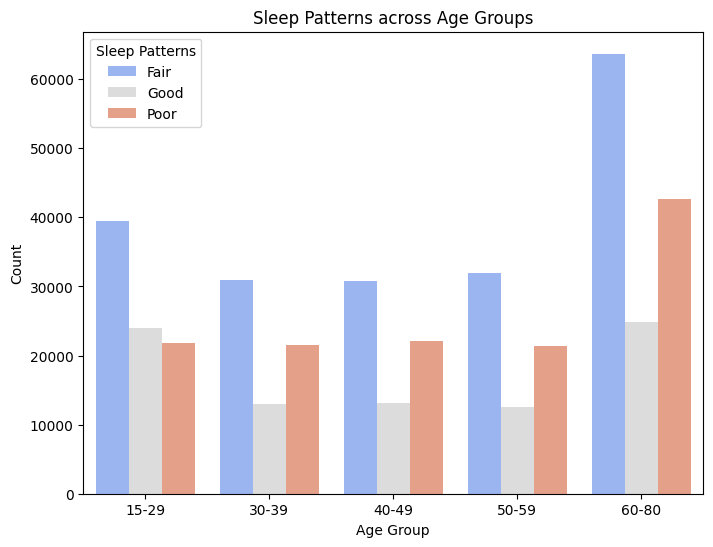

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=file, x='Age_Group', hue='Sleep Patterns', palette='coolwarm')
plt.title("Sleep Patterns across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


What percentage of individuals have chronic medical conditions?


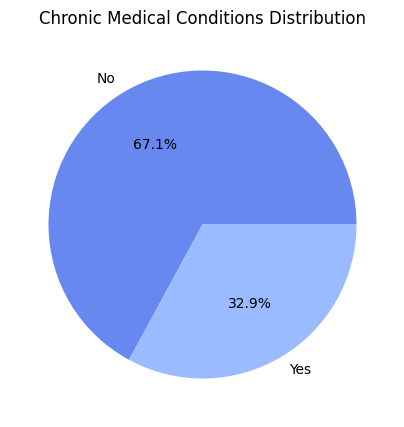

In [18]:
Chronic_Medical_Conditions=file['Chronic Medical Conditions'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=Chronic_Medical_Conditions.values,labels=Chronic_Medical_Conditions.index,autopct='%.1f%%', colors=sns.color_palette('coolwarm'))
plt.title("Chronic Medical Conditions Distribution")
plt.show()

## ------------------------------------**Exploratory Analysis Questions**---------------------------------------
## 
## 

Does education level affect income?


In [19]:
file

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Group
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,30-39
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,50-59
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,60-80
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,50-59
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,15-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No,60-80
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes,15-29
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes,50-59
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No,60-80


In [20]:
bins_1 = [0, 2000, 5000, 10000, 20000, 50000, 210000]
label_1 = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Ultra High']
file['Income_Group']=pd.cut(file['Income'],bins=bins_1,labels=label_1,right=True)
edu_level_Vs_income=file.groupby('Education Level')['Income_Group'].value_counts().reset_index(name='count')
edu_level_Vs_income

,Education Level,Income_Group,count
0,Associate Degree,Very High,36152
1,Associate Degree,Ultra High,24768
2,Associate Degree,High,9574
3,Associate Degree,Moderate,4829
4,Associate Degree,Low,2810
5,Associate Degree,Very Low,1866
6,Bachelor's Degree,Ultra High,80247
7,Bachelor's Degree,Very High,14854
8,Bachelor's Degree,High,14531
9,Bachelor's Degree,Moderate,7329


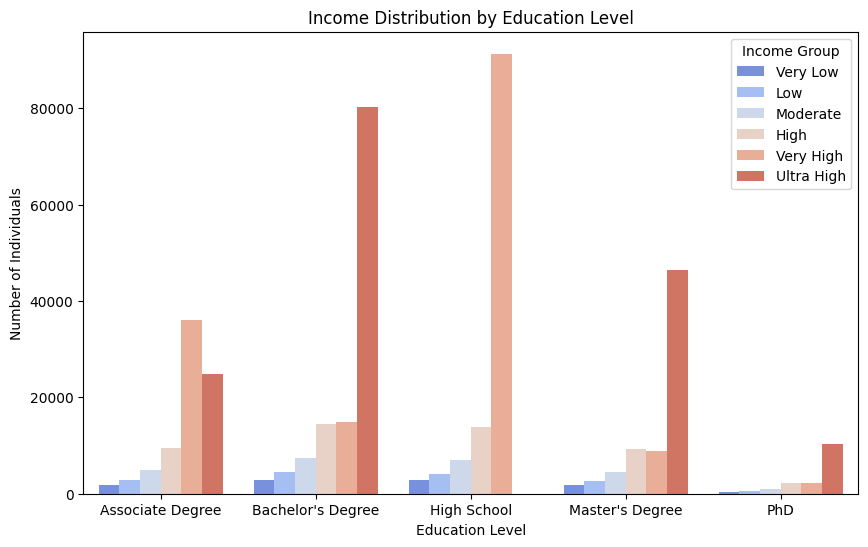

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=edu_level_Vs_income,
    x='Education Level',
    y='count',
    hue='Income_Group',
    palette='coolwarm'
)
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Individuals")
plt.legend(title="Income Group")
plt.show()


Do married individuals have higher income than single individuals?

In [22]:
married_Status_Vs_income=file.groupby('Marital Status')['Income'].mean()
married_Status_Vs_income

Marital Status
Divorced    54761.356733
Married     51897.319120
Single      48615.993046
Widowed     46518.374568
Name: Income, dtype: float64

Is there a relationship between smoking and chronic medical conditions?

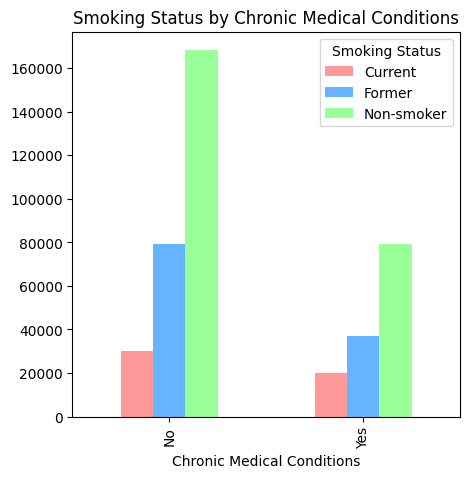

In [23]:
smoking_with_medical_condition=pd.crosstab(file['Chronic Medical Conditions'],file['Smoking Status']).plot(
    kind='bar',
    figsize=(5,5),
    color=['#ff9999','#66b3ff','#99ff99']
)

plt.title("Smoking Status by Chronic Medical Conditions")
plt.show()


Do physically active people tend to have healthier dietary habits?

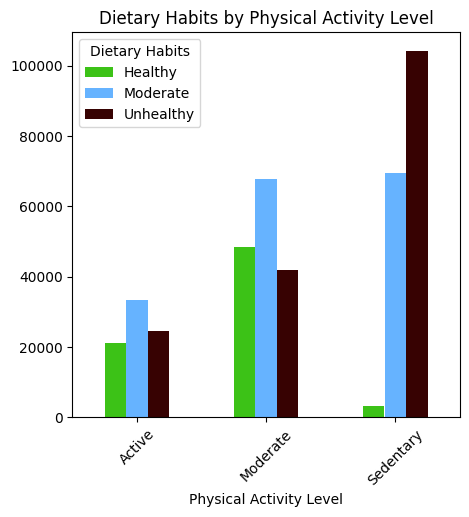

In [24]:
pd.crosstab(file['Physical Activity Level'],file['Dietary Habits']).plot(
    kind='bar',
    color=["#3cc217",'#66b3ff',"#370202"],
    figsize=(5,5)
    )
plt.title("Dietary Habits by Physical Activity Level")
plt.xticks(rotation=45)
plt.show()

Are people with poor sleep patterns more likely to have a history of mental illness?

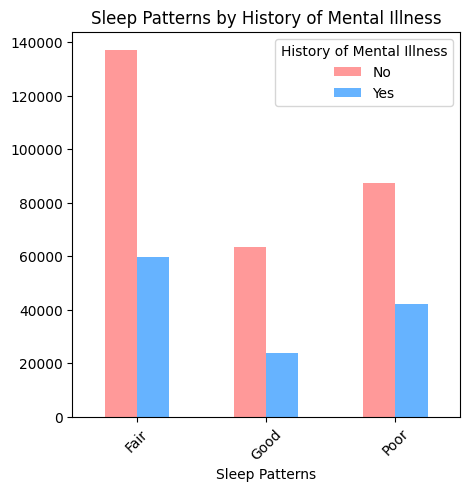

In [25]:
pd.crosstab(file['Sleep Patterns'],file['History of Mental Illness']).plot(
    kind='bar',
    figsize=(5,5),
    color=['#ff9999','#66b3ff']
)
plt.title("Sleep Patterns by History of Mental Illness")
plt.xticks(rotation=45)
plt.show()

In [26]:
table = pd.crosstab(file['Sleep Patterns'], file['History of Mental Illness'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")


Chi-square: 591.68, p-value: 0.0000


In [27]:
"""Interpretation:
The Chi-square test (χ² = 591.68, p < 0.001) shows a statistically significant relationship between sleep patterns and history of mental illness.
Individuals with poor sleep patterns are more likely to have a history of mental illness compared to those with good sleep."""

'Interpretation:\nThe Chi-square test (χ² = 591.68, p < 0.001) shows a statistically significant relationship between sleep patterns and history of mental illness.\nIndividuals with poor sleep patterns are more likely to have a history of mental illness compared to those with good sleep.'

Do individuals with a family history of depression show different lifestyle patterns or lower income?

In [28]:
f_history_with_income=file.groupby('Family History of Depression')['Income'].mean()
f_history_with_income

Family History of Depression
No     50837.364531
Yes    50184.069217
Name: Income, dtype: float64

Does the number of children influence sleep patterns or physical activity?

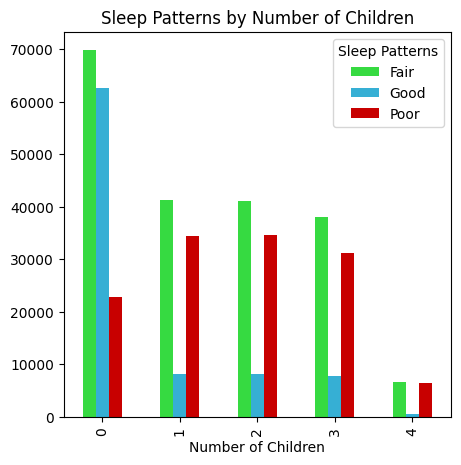

In [29]:
pd.crosstab(file['Number of Children'],file['Sleep Patterns']).plot(
    kind='bar',
    figsize=(5,5),
    color=["#36da41","#36afd4","#c80000"]
)
plt.title("Sleep Patterns by Number of Children")
plt.show()

In [30]:
table_1 = pd.crosstab(file['Number of Children'], file['Sleep Patterns'])
chi2, p, dof, expected = chi2_contingency(table_1)
print(p)


0.0


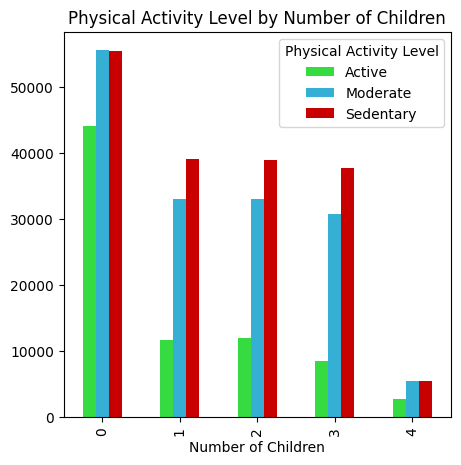

In [31]:
pd.crosstab(file['Number of Children'],file['Physical Activity Level']).plot(
    kind='bar',
    figsize=(5,5),
    color=["#36da41","#36afd4","#c80000"]
)
plt.title("Physical Activity Level by Number of Children")
plt.show()

In [32]:
table_2 = pd.crosstab(file['Number of Children'], file['Physical Activity Level'])
chi2, p, dof, expected = chi2_contingency(table_2)
print(p)


0.0


Is alcohol consumption different across education levels?

In [33]:
table_3=pd.crosstab(file['Alcohol Consumption'],file['Education Level'])
chi2,p,dof,expected=chi2_contingency(table_3)
print(p)

0.0


## --------------------------------------------------------------------------------------------------------------
## ---------------------------------------------*End of Questions*-----------------------------------------------
## --------------------------------------------------------------------------------------------------------------


# detect Outliers

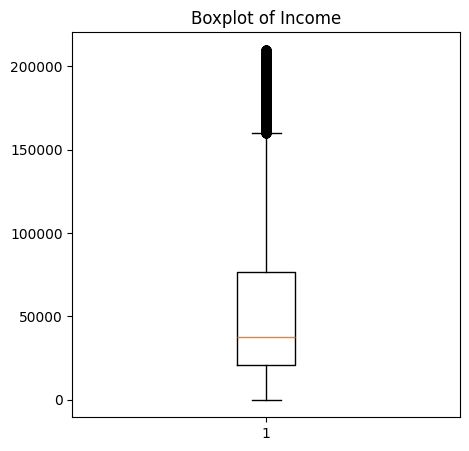

In [34]:
plt.figure(figsize=(5,5))
plt.boxplot(data=file,x='Income')
plt.title("Boxplot of Income")
plt.show()

# fix Outliers

In [35]:
file['fixed_Income']=winsorize(file['Income'],limits=[0.01,0.1])

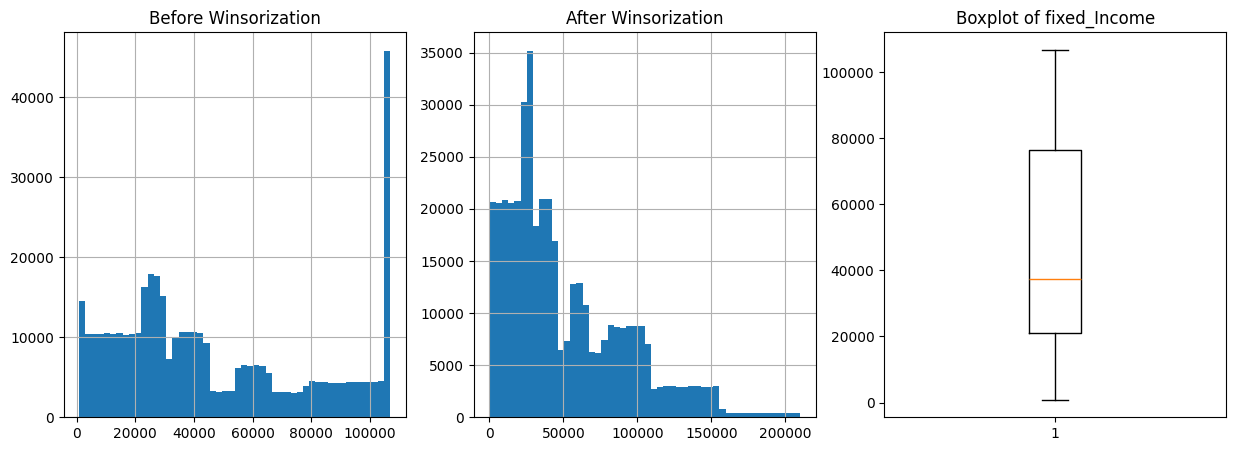

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
file['fixed_Income'].hist(bins=50)
plt.title("Before Winsorization")

plt.subplot(1,3,2)
file['Income'].hist(bins=50)
plt.title("After Winsorization")

plt.subplot(1,3,3)
plt.boxplot(data=file,x='fixed_Income')
plt.title("Boxplot of fixed_Income")

plt.show()

In [37]:
file.drop(labels='Income',axis=1,inplace=True)
file.drop(labels='Name',axis=1,inplace=True)
file.drop(labels='Age_Group',axis=1,inplace=True)
file.drop(labels='Income_Group',axis=1,inplace=True)

In [38]:
file

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,fixed_Income
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,26265.67
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,42710.36
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,106818.09
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,9992.78
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,8595.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,Married,Master's Degree,0,Former,Moderate,Employed,Low,Healthy,Good,No,No,No,No,106818.09
413764,26,Single,Bachelor's Degree,0,Current,Active,Employed,Low,Healthy,Poor,Yes,Yes,No,Yes,96760.97
413765,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,Moderate,Moderate,Fair,No,No,Yes,Yes,77353.26
413766,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,Moderate,Moderate,Poor,No,Yes,No,No,24557.08
